In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
 
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
col_name=['id','brand','emotion','tweet']
df=pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv',names=col_name)
df

,id,brand,emotion,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       74682 non-null  int64 
 1   brand    74682 non-null  object
 2   emotion  74682 non-null  object
 3   tweet    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df[df.tweet.isna()==True]

,id,brand,emotion,tweet
61,2411,Borderlands,Neutral,NaN
553,2496,Borderlands,Neutral,NaN
589,2503,Borderlands,Neutral,NaN
745,2532,Borderlands,Positive,NaN
1105,2595,Borderlands,Positive,NaN
...,...,...,...,...
73972,9073,Nvidia,Positive,NaN
73973,9073,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN
74422,9154,Nvidia,Positive,NaN


In [6]:
df.dropna(inplace=True)
df

,id,brand,emotion,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
df.drop_duplicates(inplace=True)
df

,id,brand,emotion,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [9]:
df['textPreprocessed']=df['tweet'].apply( preprocess)
df

,id,brand,emotion,tweet,textPreprocessed
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,m get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realize Windows partition Mac like 6 year Nvid...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realize Mac window partition 6 year Nvidia dri...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realize window partition Mac 6 year Nvidia dri...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realize window partition Mac like 6 year Nvidi...


Text(0.5, 1.0, 'Category Distribution')

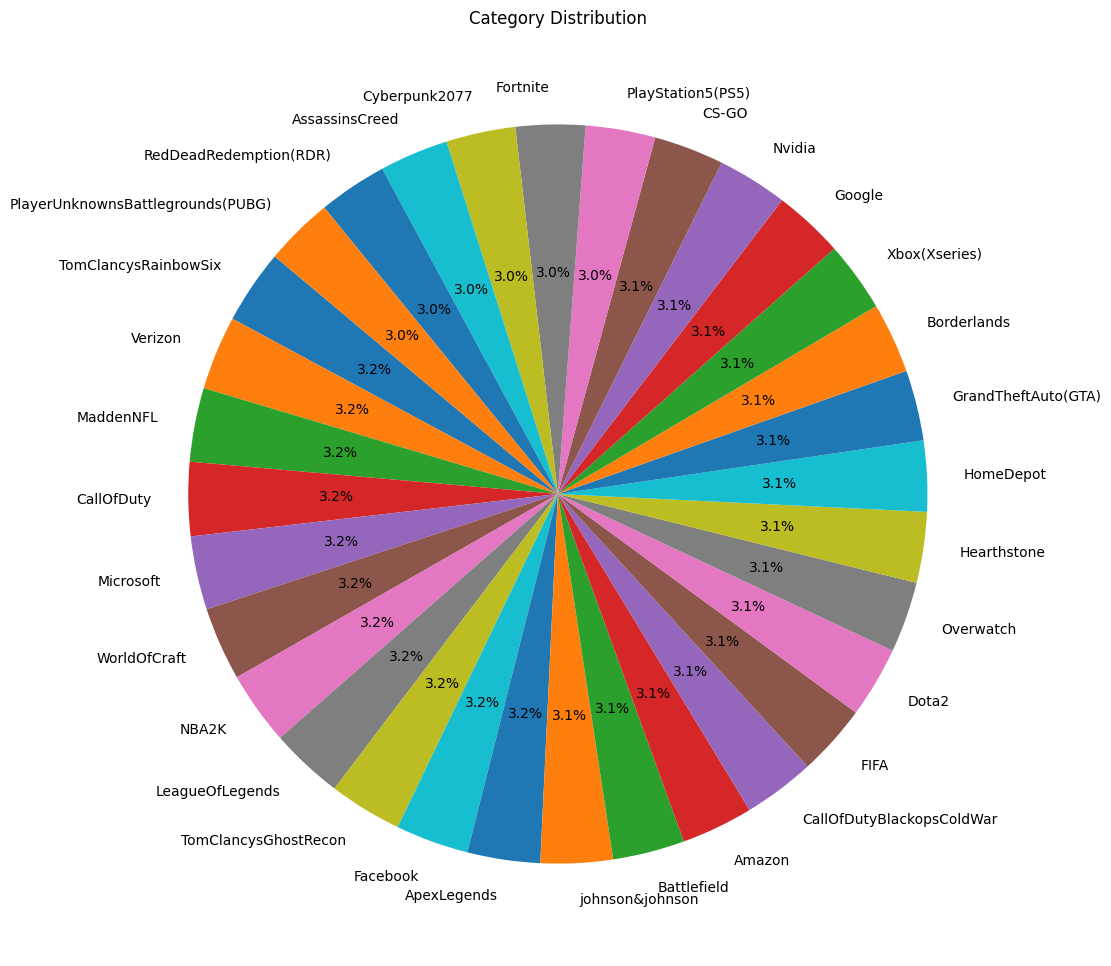

In [10]:
value_counts= df['brand'].value_counts()
plt.figure(figsize=(12, 12))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Category Distribution")

In [11]:
df['emotion'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

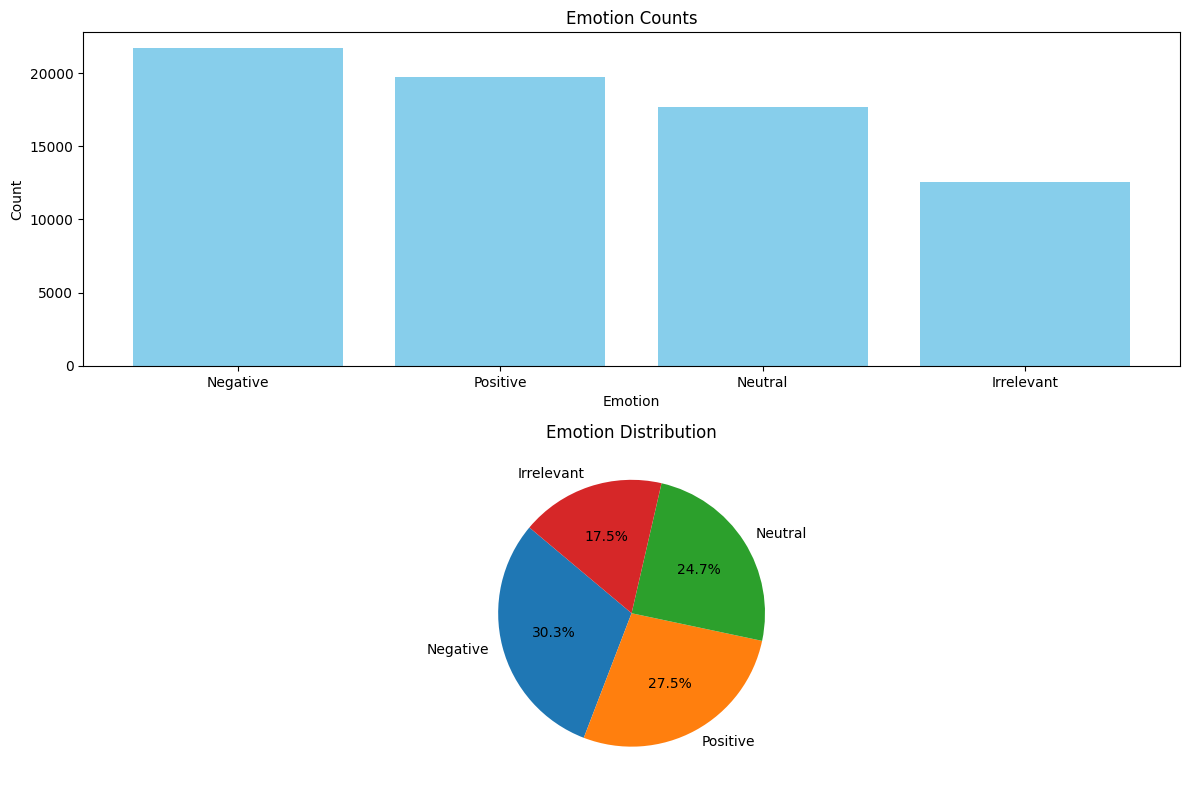

In [12]:
value_counts = df['emotion'].value_counts()

# Create a figure with subplots
plt.figure(figsize=(12, 8))

# Bar plot
plt.subplot(2, 1, 1)  # First subplot (2 rows, 1 column, 1st plot)
plt.bar(value_counts.index, value_counts, color='skyblue')
plt.title('Emotion Counts')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Pie chart
plt.subplot(2, 1, 2)  # Second subplot (2 rows, 1 column, 2nd plot)
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Emotion Distribution')

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

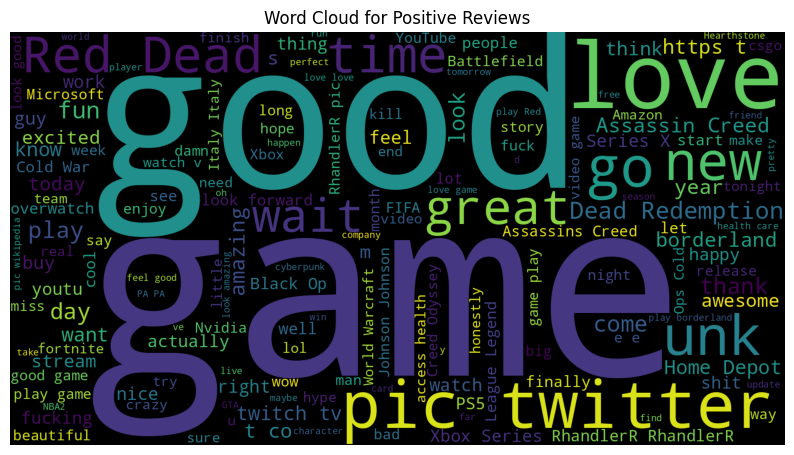

In [13]:
positive_reviews = df[df['emotion'] == 'Positive']['textPreprocessed']
pos = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         
                          min_font_size=15).generate(pos)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

(-0.5, 1499.5, 799.5, -0.5)

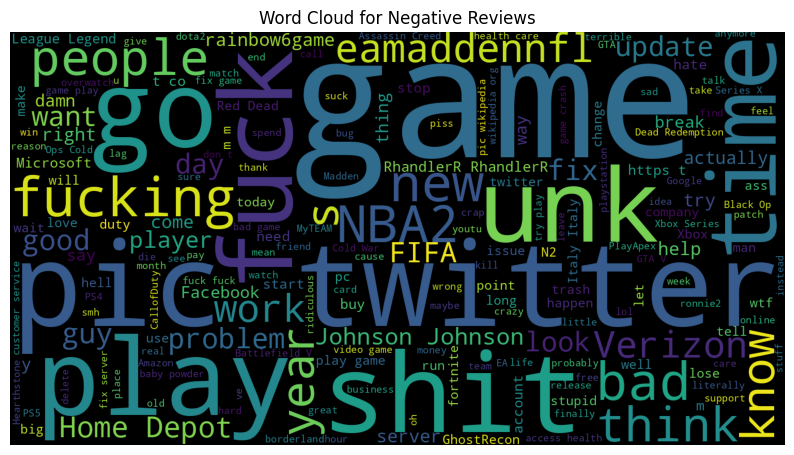

In [14]:
negative_reviews = df[df['emotion'] == 'Negative']['textPreprocessed']
pos = ' '.join(map(str, negative_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         
                          min_font_size=15).generate(pos)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

(-0.5, 1499.5, 799.5, -0.5)

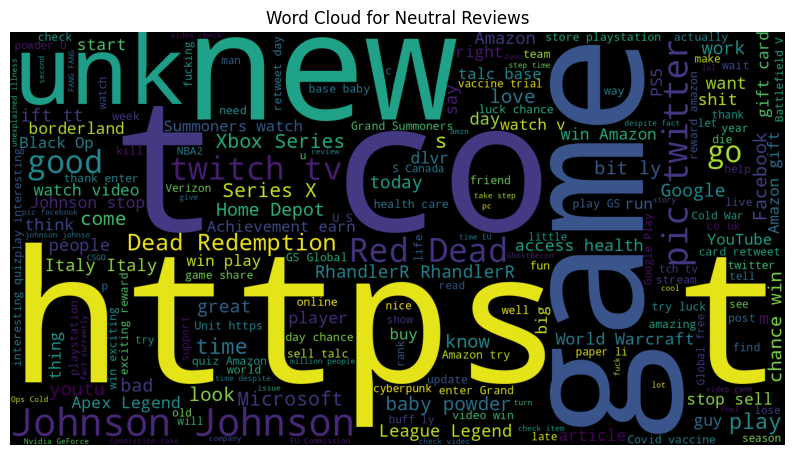

In [15]:
Neutral_reviews = df[df['emotion'] == 'Neutral']['textPreprocessed']
pos = ' '.join(map(str, Neutral_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         
                          min_font_size=15).generate(pos)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Neutral Reviews')
plt.axis('off')

(-0.5, 1499.5, 799.5, -0.5)

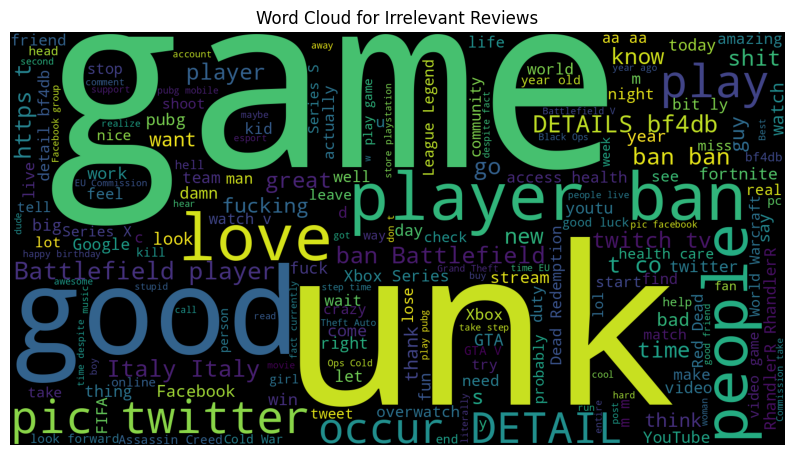

In [16]:
Irrelevant_reviews = df[df['emotion'] == 'Irrelevant']['textPreprocessed']
pos = ' '.join(map(str, Irrelevant_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         
                          min_font_size=15).generate(pos)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Irrelevant Reviews')
plt.axis('off')

<Axes: xlabel='brand'>

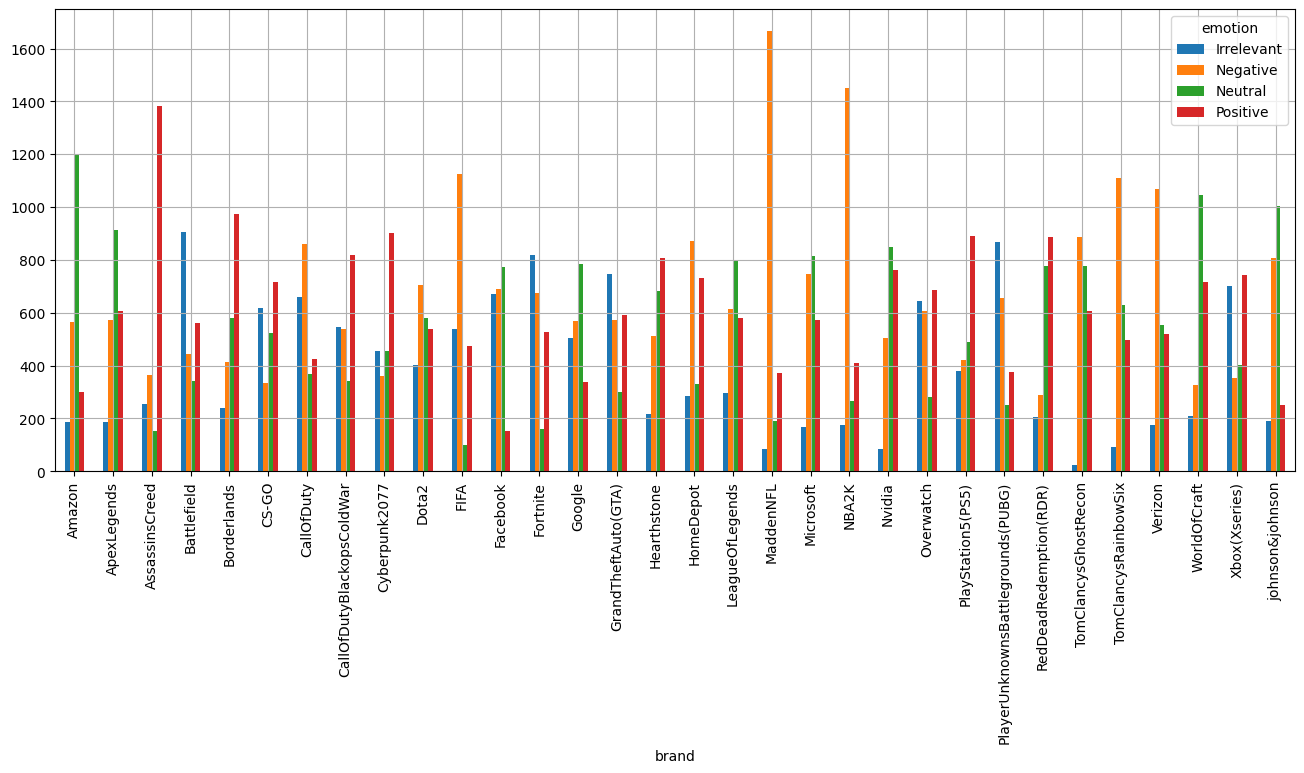

In [17]:
reactions_entities = pd.crosstab(df['brand'],df['emotion'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)

In [18]:
x=df['textPreprocessed']
y=df['emotion']

In [19]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x, y, 
                                                    test_size=0.2, random_state=42, stratify=y)

In [21]:
randomforest=RandomForestClassifier ()
pipeline= Pipeline(steps=[
    
                        ('TfidfVectorize',TfidfVectorizer()) ,
                         ('randomforest',randomforest)
                        ])

In [22]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('TfidfVectorize', TfidfVectorizer()),
                ('randomforest', RandomForestClassifier())])

In [23]:
pipeline.score(x_test,y_test)

0.9100614010605638

In [24]:
y_pred = pipeline.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred)
print(conf_matrix_nb)

[[2129  103   63  212]
 [  28 4024   66  222]
 [  24  103 3174  241]
 [  30  122   75 3716]]


In [26]:
from sklearn.metrics import classification_report
classification_re = classification_report(y_test, y_pred)
print(classification_re)

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2507
           1       0.92      0.93      0.93      4340
           2       0.94      0.90      0.92      3542
           3       0.85      0.94      0.89      3943

    accuracy                           0.91     14332
   macro avg       0.92      0.90      0.91     14332
weighted avg       0.91      0.91      0.91     14332

